In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive

In [3]:
drive.mount('/content/drive',force_remount=True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/face/train',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/face/test',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 50 images belonging to 1 classes.
Found 10 images belonging to 1 classes.


In [17]:
model=Sequential()
#model CNN

# input
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
# 1
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# 2
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# output
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(2,activation='Softmax'))

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

#opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]

In [18]:
history=model.fit(train,steps_per_epoch=len(train),batch_size = 64,epochs=10,validation_data=test,validation_steps=len(test),callbacks=callbacks,verbose = 1)

Epoch 1/10
2/2 [==============================] - 6s 3s/step - loss: 18.2548 - accuracy: 0.6400 - val_loss: 19.6799 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 5s 2s/step - loss: 33.0254 - accuracy: 0.3600 - val_loss: 79.6458 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 5s 3s/step - loss: 52.3578 - accuracy: 1.0000 - val_loss: 71.8650 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 5s 3s/step - loss: 127.7088 - accuracy: 0.0000e+00 - val_loss: 200.5737 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 5s 3s/step - loss: 127.6587 - accuracy: 0.0000e+00 - val_loss: 196.4464 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 5s 3s/step - loss: 257.6133 - accuracy: 1.0000 - val_loss: 161.5758 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 5s 2s/step - loss: 208.5285 - accuracy: 0.6400 - val_loss: 617.5092 - val_accuracy: 0.0000

In [19]:
model.save('face_CNN.h5')

In [20]:
from keras.models import load_model
models = load_model('face_CNN.h5')

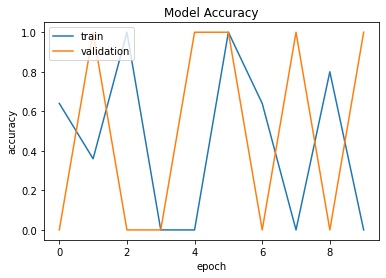

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

0


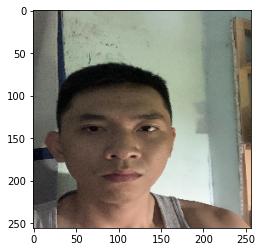

In [23]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('trung.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(np.argmax(model.predict(img)))